In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install lifelines
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Breast Cancer METABRIC.csv')

# Descriptive statistics
print(data.describe())
print(data.info())

# Visualization
# sns.histplot(data['age_at_diagnosis'])
# plt.show()

       Age at Diagnosis       Cohort  Neoplasm Histologic Grade  \
count       2498.000000  2498.000000                2388.000000   
mean          60.420300     2.900320                   2.412060   
std           13.032997     1.962216                   0.649363   
min           21.930000     1.000000                   1.000000   
25%           50.920000     1.000000                   2.000000   
50%           61.110000     3.000000                   3.000000   
75%           70.000000     4.000000                   3.000000   
max           96.290000     9.000000                   3.000000   

       Lymph nodes examined positive  Mutation Count  \
count                    2243.000000     2357.000000   
mean                        1.950513        5.578702   
std                         4.017774        3.967967   
min                         0.000000        1.000000   
25%                         0.000000        3.000000   
50%                         0.000000        5.000000   
75% 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.dtypes

,0
Patient ID,object
Age at Diagnosis,float64
Type of Breast Surgery,object
Cancer Type,object
Cancer Type Detailed,object
Cellularity,object
Chemotherapy,object
Pam50 + Claudin-low subtype,object
Cohort,float64
ER status measured by IHC,object


In [ ]:
# from lifelines import KaplanMeierFitter, CoxPHFitter

# # Kaplan-Meier Curve
# kmf = KaplanMeierFitter()
# kmf.fit(durations=data['Overall Survival (Months)'], event_observed=data['Tumor Stage'])
# kmf.plot_survival_function()
# plt.show()

# # Cox Proportional Hazards Model
# cph = CoxPHFitter()
# cph.fit(data, duration_col='Overall Survival (Months)', event_col='Tumor Stage')
# cph.print_summary()


In [ ]:
data.isnull().sum()

,0
Patient ID,0
Age at Diagnosis,11
Type of Breast Surgery,554
Cancer Type,0
Cancer Type Detailed,0
Cellularity,592
Chemotherapy,529
Pam50 + Claudin-low subtype,529
Cohort,11
ER status measured by IHC,83


In [ ]:
data.shape

(2509, 34)

In [ ]:
# Calculate the mean age, ignoring NaN values
mean_age = data['Age at Diagnosis'].mean()

# Fill missing values in the 'age' column with the mean age
data['Age at Diagnosis'].fillna(mean_age, inplace=True)

In [ ]:
data.isnull().sum()

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,554
Cancer Type,0
Cancer Type Detailed,0
Cellularity,592
Chemotherapy,529
Pam50 + Claudin-low subtype,529
Cohort,11
ER status measured by IHC,83


In [ ]:
data.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [ ]:
# Calculate the mean age, ignoring NaN values
#mode_tbs = data['Type of Breast Surgery'].mode()

# Fill missing values in the 'age' column with the mean age
data['Type of Breast Surgery']=data['Type of Breast Surgery'].fillna(data['Type of Breast Surgery'].mode()[0])

In [ ]:
data.isnull().sum()

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,592
Chemotherapy,529
Pam50 + Claudin-low subtype,529
Cohort,11
ER status measured by IHC,83


In [ ]:
data['Cellularity']=data['Cellularity'].fillna(data['Cellularity'].mode()[0])

In [ ]:
data.isnull().sum()

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,529
Pam50 + Claudin-low subtype,529
Cohort,11
ER status measured by IHC,83


In [ ]:
data['Chemotherapy']=data['Chemotherapy'].fillna(data['Chemotherapy'].mode()[0])

In [ ]:
data.isnull().sum()

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,529
Cohort,11
ER status measured by IHC,83


In [ ]:
data['Pam50 + Claudin-low subtype']=data['Pam50 + Claudin-low subtype'].fillna(data['Pam50 + Claudin-low subtype'].mode()[0])

In [ ]:
data.isnull().sum()

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,11
ER status measured by IHC,83


In [ ]:
def fill_missing_with_mode(df, column_name):

    # Calculate the mode of the specified column
    mode_value = df[column_name].mode()

    if not mode_value.empty:
        # Get the first mode (in case there are multiple modes)
        mode_value = mode_value[0]

        # Fill missing values with the mode
        df[column_name].fillna(mode_value, inplace=True)

    return df.isnull().sum()


In [ ]:
fill_missing_with_mode(data,'ER status measured by IHC')

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.6500,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.1900,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.8700,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.6800,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.9700,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,MTS-T2428,70.0500,Mastectomy,Breast Cancer,Invasive Breast Carcinoma,High,No,LumA,1.0,Positve,...,NaN,NaN,NaN,4.93,Recurred,Female,NaN,27.0,1.0,NaN
2505,MTS-T2429,63.6000,Mastectomy,Breast Cancer,Invasive Breast Carcinoma,High,No,LumA,1.0,Positve,...,NaN,NaN,NaN,16.18,Recurred,Female,NaN,28.0,2.0,NaN
2506,MTS-T2430,60.4203,Mastectomy,Breast Cancer,Invasive Breast Carcinoma,High,No,LumA,NaN,Positve,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN
2507,MTS-T2431,60.4203,Mastectomy,Breast Cancer,Invasive Breast Carcinoma,High,No,LumA,NaN,Positve,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN


In [ ]:
data.isnull().sum()

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,11
ER status measured by IHC,0


In [ ]:
data.dtypes

,0
Patient ID,object
Age at Diagnosis,float64
Type of Breast Surgery,object
Cancer Type,object
Cancer Type Detailed,object
Cellularity,object
Chemotherapy,object
Pam50 + Claudin-low subtype,object
Cohort,float64
ER status measured by IHC,object


In [ ]:
fill_missing_with_mode(data,'ER Status')

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.6500,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.1900,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.8700,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.6800,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.9700,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,MTS-T2428,70.0500,Mastectomy,Breast Cancer,Invasive Breast Carcinoma,High,No,LumA,1.0,Positve,...,NaN,NaN,NaN,4.93,Recurred,Female,NaN,27.0,1.0,NaN
2505,MTS-T2429,63.6000,Mastectomy,Breast Cancer,Invasive Breast Carcinoma,High,No,LumA,1.0,Positve,...,NaN,NaN,NaN,16.18,Recurred,Female,NaN,28.0,2.0,NaN
2506,MTS-T2430,60.4203,Mastectomy,Breast Cancer,Invasive Breast Carcinoma,High,No,LumA,NaN,Positve,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN
2507,MTS-T2431,60.4203,Mastectomy,Breast Cancer,Invasive Breast Carcinoma,High,No,LumA,NaN,Positve,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN


In [ ]:
data.isnull().sum()

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,11
ER status measured by IHC,0


In [ ]:
fill_missing_with_mode(data,"HER2 status measured by SNP6")

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.6500,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.1900,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.8700,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.6800,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.9700,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,MTS-T2428,70.0500,Mastectomy,Breast Cancer,Invasive Breast Carcinoma,High,No,LumA,1.0,Positve,...,NaN,NaN,NaN,4.93,Recurred,Female,NaN,27.0,1.0,NaN
2505,MTS-T2429,63.6000,Mastectomy,Breast Cancer,Invasive Breast Carcinoma,High,No,LumA,1.0,Positve,...,NaN,NaN,NaN,16.18,Recurred,Female,NaN,28.0,2.0,NaN
2506,MTS-T2430,60.4203,Mastectomy,Breast Cancer,Invasive Breast Carcinoma,High,No,LumA,NaN,Positve,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN
2507,MTS-T2431,60.4203,Mastectomy,Breast Cancer,Invasive Breast Carcinoma,High,No,LumA,NaN,Positve,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN


In [ ]:
data.isnull().sum()

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,11
ER status measured by IHC,0


In [ ]:
fill_missing_with_mode(data,"HER2 Status")

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.6500,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.1900,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.8700,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.6800,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.9700,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,MTS-T2428,70.0500,Mastectomy,Breast Cancer,Invasive Breast Carcinoma,High,No,LumA,1.0,Positve,...,NaN,NaN,NaN,4.93,Recurred,Female,NaN,27.0,1.0,NaN
2505,MTS-T2429,63.6000,Mastectomy,Breast Cancer,Invasive Breast Carcinoma,High,No,LumA,1.0,Positve,...,NaN,NaN,NaN,16.18,Recurred,Female,NaN,28.0,2.0,NaN
2506,MTS-T2430,60.4203,Mastectomy,Breast Cancer,Invasive Breast Carcinoma,High,No,LumA,NaN,Positve,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN
2507,MTS-T2431,60.4203,Mastectomy,Breast Cancer,Invasive Breast Carcinoma,High,No,LumA,NaN,Positve,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN


In [ ]:
fill_missing_with_mode(data,'HER2 Status')

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,11
ER status measured by IHC,0


In [ ]:
data.dtypes

,0
Patient ID,object
Age at Diagnosis,float64
Type of Breast Surgery,object
Cancer Type,object
Cancer Type Detailed,object
Cellularity,object
Chemotherapy,object
Pam50 + Claudin-low subtype,object
Cohort,float64
ER status measured by IHC,object


In [ ]:
fill_missing_with_mode(data,'Tumor Other Histologic Subtype')

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,11
ER status measured by IHC,0


In [ ]:
fill_missing_with_mode(data,'Hormone Therapy')

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,11
ER status measured by IHC,0


In [ ]:
fill_missing_with_mode(data,'Inferred Menopausal State')

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,11
ER status measured by IHC,0


In [ ]:
fill_missing_with_mode(data,"Integrative Cluster")

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,11
ER status measured by IHC,0


In [ ]:
fill_missing_with_mode(data,'Primary Tumor Laterality')

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,11
ER status measured by IHC,0


In [ ]:
fill_missing_with_mode(data,'Overall Survival Status')

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,11
ER status measured by IHC,0


In [ ]:
fill_missing_with_mode(data,'PR Status')

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,11
ER status measured by IHC,0


In [ ]:
fill_missing_with_mode(data,'Radio Therapy')

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,11
ER status measured by IHC,0


In [ ]:
fill_missing_with_mode(data,'Relapse Free Status')

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,11
ER status measured by IHC,0


In [ ]:
fill_missing_with_mode(data,'3-Gene classifier subtype')

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,11
ER status measured by IHC,0


In [ ]:
data.dtypes

,0
Patient ID,object
Age at Diagnosis,float64
Type of Breast Surgery,object
Cancer Type,object
Cancer Type Detailed,object
Cellularity,object
Chemotherapy,object
Pam50 + Claudin-low subtype,object
Cohort,float64
ER status measured by IHC,object


In [ ]:
fill_missing_with_mode(data,"Patient's Vital Status")

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,11
ER status measured by IHC,0


<Axes: xlabel='Neoplasm Histologic Grade', ylabel='Count'>

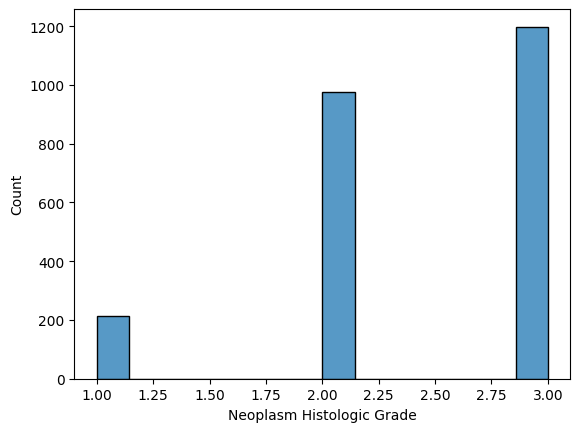

In [ ]:
sns.histplot(data["Neoplasm Histologic Grade"])

In [ ]:
median_value = data['Neoplasm Histologic Grade'].median()

# Fill null values with the median
data['Neoplasm Histologic Grade'].fillna(median_value, inplace=True)

In [ ]:
data.isnull().sum()

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,11
ER status measured by IHC,0


<Axes: xlabel='Lymph nodes examined positive', ylabel='Count'>

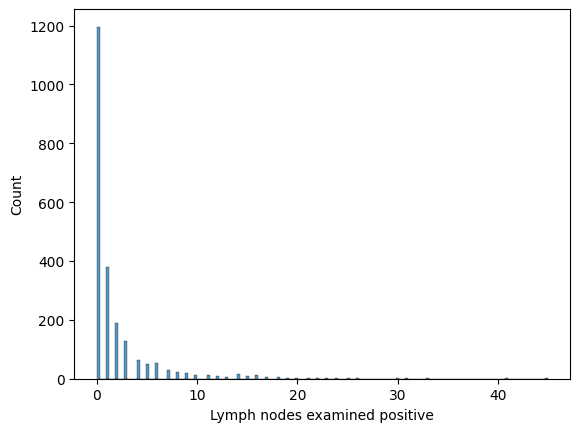

In [ ]:
sns.histplot(data["Lymph nodes examined positive"])

In [ ]:
median_value = data['Lymph nodes examined positive'].median()

# Fill null values with the median
data['Lymph nodes examined positive'].fillna(median_value, inplace=True)

In [ ]:
data.isnull().sum()

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,11
ER status measured by IHC,0


<Axes: xlabel='Mutation Count', ylabel='Count'>

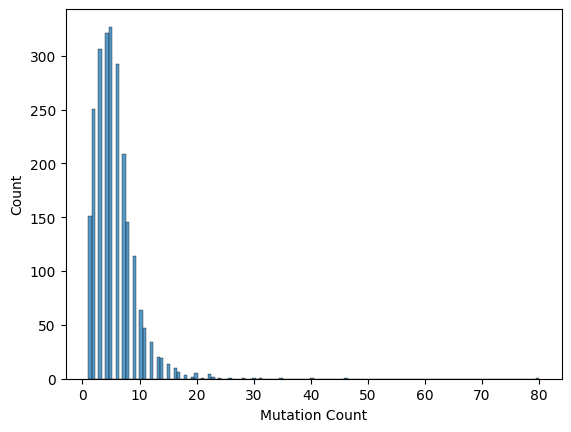

In [ ]:
sns.histplot(data["Mutation Count"])

In [ ]:
median_value = data['Mutation Count'].median()

# Fill null values with the median
data['Mutation Count'].fillna(median_value, inplace=True)

In [ ]:
data.isnull().sum()

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,11
ER status measured by IHC,0


<Axes: xlabel='Nottingham prognostic index', ylabel='Count'>

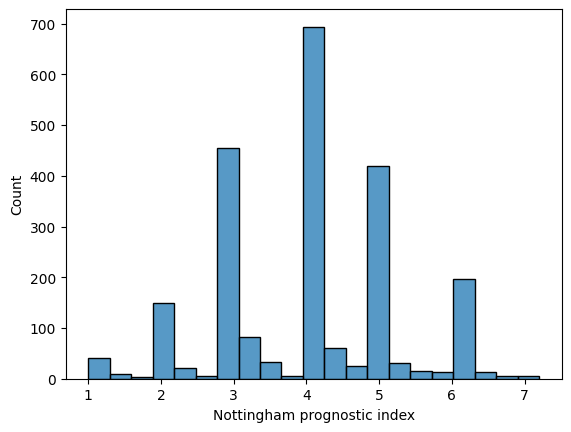

In [ ]:
sns.histplot(data["Nottingham prognostic index"])

In [ ]:
median_value = data['Nottingham prognostic index'].median()

# Fill null values with the median
data['Nottingham prognostic index'].fillna(median_value, inplace=True)

In [ ]:
data.isnull().sum()

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,11
ER status measured by IHC,0


<Axes: xlabel='Overall Survival (Months)', ylabel='Count'>

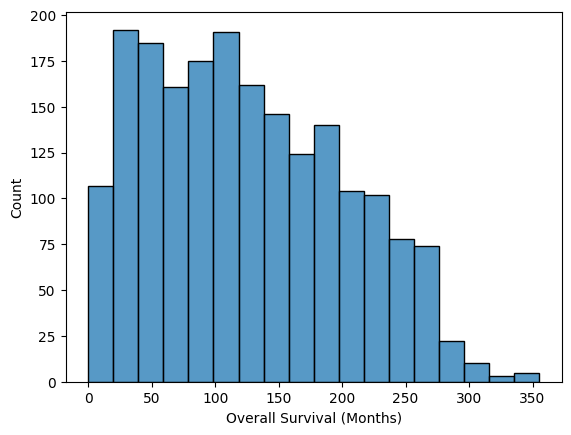

In [ ]:
sns.histplot(data["Overall Survival (Months)"])

In [ ]:
median_value = data['Overall Survival (Months)'].median()

# Fill null values with the median
data['Overall Survival (Months)'].fillna(median_value, inplace=True)

In [ ]:
data.isnull().sum()

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,11
ER status measured by IHC,0


<Axes: xlabel='Cohort', ylabel='Count'>

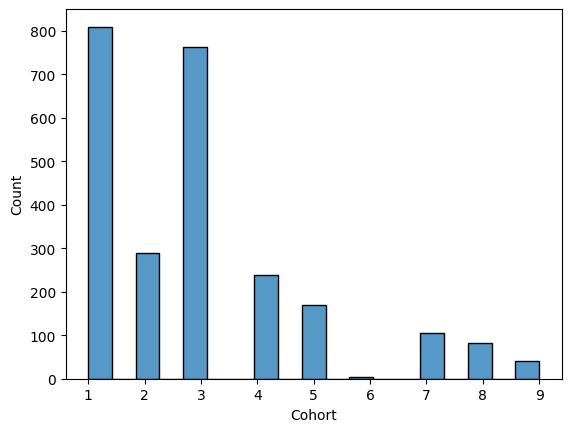

In [ ]:
sns.histplot(data["Cohort"])

In [ ]:
median_value = data['Cohort'].median()

# Fill null values with the median
data['Cohort'].fillna(median_value, inplace=True)

In [ ]:
data.isnull().sum()

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,0
ER status measured by IHC,0


<Axes: xlabel='Relapse Free Status (Months)', ylabel='Count'>

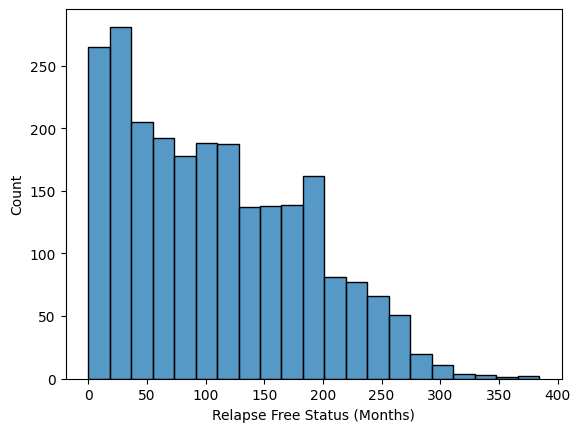

In [ ]:
sns.histplot(data["Relapse Free Status (Months)"])

In [ ]:
median_value = data['Relapse Free Status (Months)'].median()

# Fill null values with the median
data['Relapse Free Status (Months)'].fillna(median_value, inplace=True)

In [ ]:
data.isnull().sum()

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,0
ER status measured by IHC,0


<Axes: xlabel='Tumor Size', ylabel='Count'>

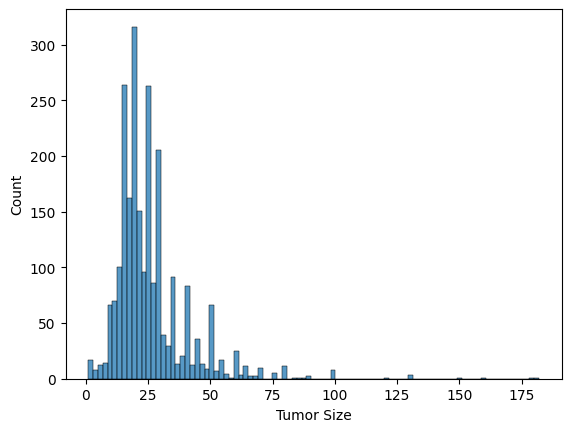

In [ ]:
sns.histplot(data["Tumor Size"])

In [ ]:
median_value = data['Tumor Size'].median()

# Fill null values with the median
data['Tumor Size'].fillna(median_value, inplace=True)

In [ ]:
data.isnull().sum()

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,0
ER status measured by IHC,0


<Axes: xlabel='Tumor Stage', ylabel='Count'>

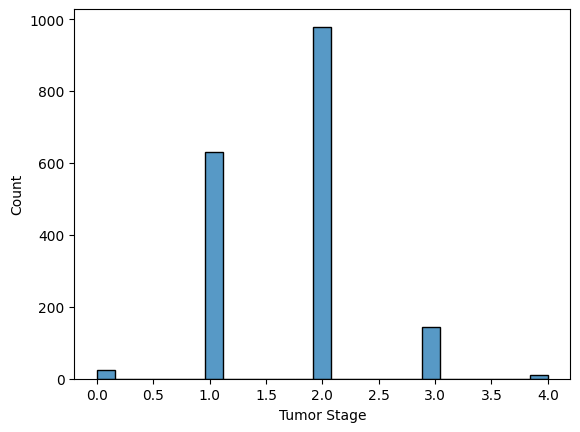

In [ ]:
sns.histplot(data["Tumor Stage"])

In [ ]:
median_value = data['Tumor Stage'].median()

# Fill null values with the median
data['Tumor Stage'].fillna(median_value, inplace=True)

In [ ]:
data.isnull().sum()

,0
Patient ID,0
Age at Diagnosis,0
Type of Breast Surgery,0
Cancer Type,0
Cancer Type Detailed,0
Cellularity,0
Chemotherapy,0
Pam50 + Claudin-low subtype,0
Cohort,0
ER status measured by IHC,0


In [ ]:
data.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,ER+/HER2- Low Prolif,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,ER+/HER2- Low Prolif,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [ ]:
def label_encode_categorical(df):

    # Identify categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    # Apply label encoding to each categorical column
    for col in categorical_cols:
        df[col] = df[col].astype('category').cat.codes

    return df.dtypes


In [ ]:
label_encode_categorical(data)

,0
Patient ID,int16
Age at Diagnosis,float64
Type of Breast Surgery,int8
Cancer Type,int8
Cancer Type Detailed,int8
Cellularity,int8
Chemotherapy,int8
Pam50 + Claudin-low subtype,int8
Cohort,float64
ER status measured by IHC,int8


In [ ]:
data.corr()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
Patient ID,1.000000,-0.038002,0.227765,-0.049427,0.119671,-0.295046,-0.233255,-0.202537,0.536762,-0.111603,...,-0.338975,0.286153,0.146026,-0.010360,-0.004346,NaN,-0.019208,-0.012520,0.030085,0.250733
Age at Diagnosis,-0.038002,1.000000,0.063954,-0.016047,0.001910,0.053194,-0.337756,0.016516,-0.059670,0.300919,...,-0.213380,0.029381,-0.141176,-0.090938,-0.070346,NaN,-0.189437,0.066149,0.056701,-0.167542
Type of Breast Surgery,0.227765,0.063954,1.000000,-0.001527,0.080113,-0.102888,-0.032707,-0.078730,0.115092,-0.039178,...,-0.282812,0.109927,-0.317426,-0.098672,0.072836,NaN,-0.003605,0.198024,0.172230,0.013446
Cancer Type,-0.049427,-0.016047,-0.001527,1.000000,-0.035063,-0.000251,-0.015336,0.080208,-0.033596,0.019589,...,0.048902,-0.044701,-0.050247,-0.017630,-0.028213,NaN,0.026432,-0.008304,-0.048482,0.029083
Cancer Type Detailed,0.119671,0.001910,0.080113,-0.035063,1.000000,-0.028513,-0.132566,0.019214,0.096880,0.098006,...,-0.082161,0.139538,0.030713,0.027113,-0.019160,NaN,-0.069007,-0.025501,-0.109334,0.093528
Cellularity,-0.295046,0.053194,-0.102888,-0.000251,-0.028513,1.000000,0.027119,0.143141,-0.129690,0.117900,...,0.129394,-0.126650,-0.162131,0.028870,0.026695,NaN,0.011138,-0.017243,-0.011973,-0.176567
Chemotherapy,-0.233255,-0.337756,-0.032707,-0.015336,-0.132566,0.027119,1.000000,-0.042760,-0.134713,-0.429097,...,0.117642,-0.328165,0.127867,-0.119264,0.126226,NaN,0.290908,0.182498,0.246367,-0.163901
Pam50 + Claudin-low subtype,-0.202537,0.016516,-0.078730,0.080208,0.019214,0.143141,-0.042760,1.000000,-0.123264,0.149756,...,0.123368,-0.040489,-0.055122,0.037980,-0.035018,NaN,-0.075422,-0.036416,-0.032226,-0.009598
Cohort,0.536762,-0.059670,0.115092,-0.033596,0.096880,-0.129690,-0.134713,-0.123264,1.000000,-0.018255,...,-0.182203,0.121445,-0.007013,0.015271,-0.033074,NaN,-0.010655,-0.037990,0.038780,0.071877
ER status measured by IHC,-0.111603,0.300919,-0.039178,0.019589,0.098006,0.117900,-0.429097,0.149756,-0.018255,1.000000,...,0.020036,0.314668,-0.109223,0.048157,-0.058440,NaN,-0.446006,-0.091221,-0.095376,-0.002452


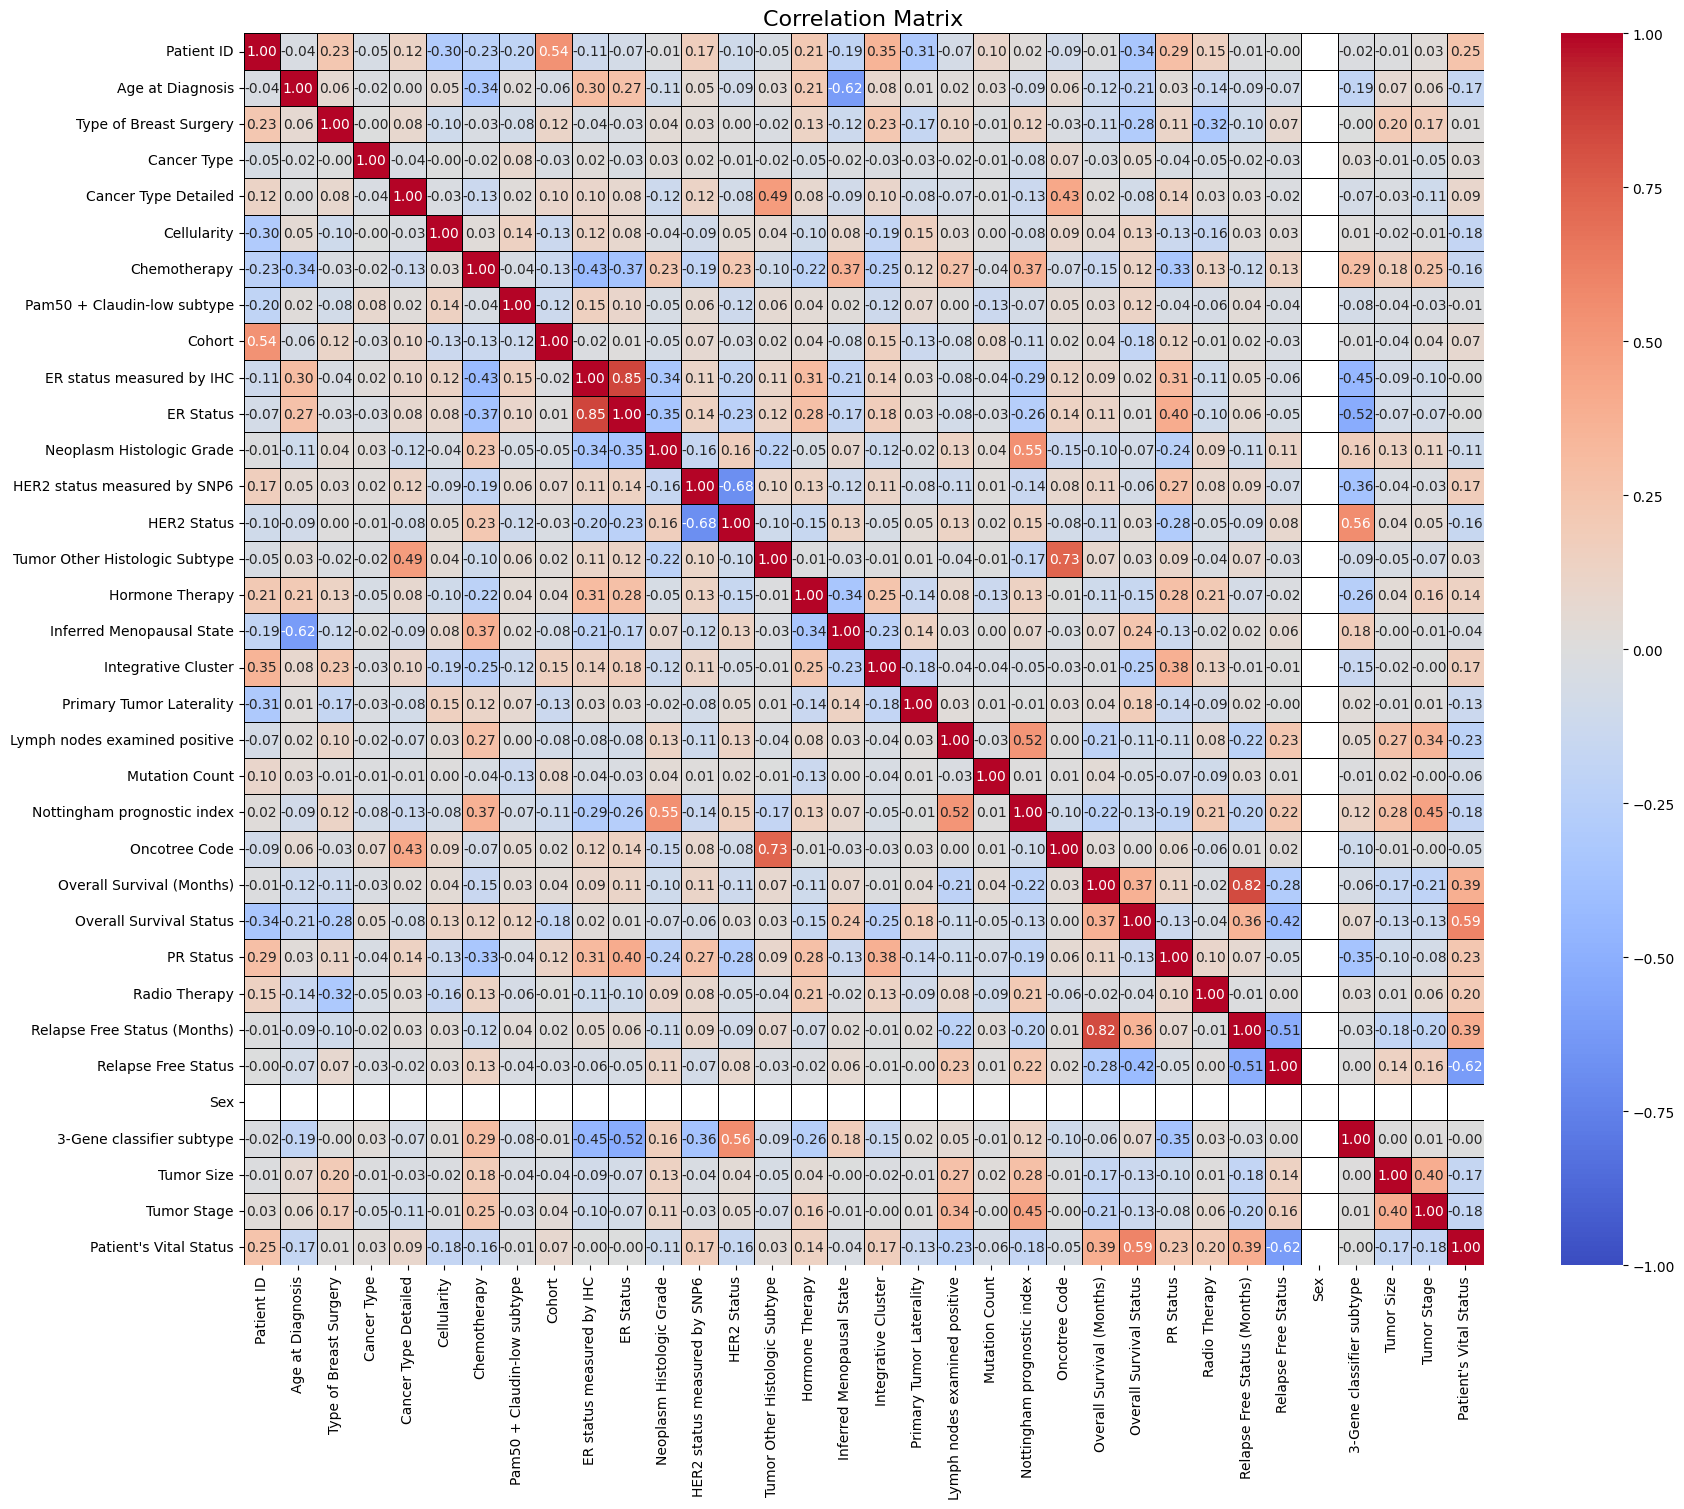

In [ ]:

# Compute the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            vmin=-1, vmax=1, center=0,
            linewidths=0.5, linecolor='black')

# Add titles and labels
plt.title('Correlation Matrix', size=16)
plt.show()


## Model Selection

In [ ]:
data.rename(columns={"Patient's Vital Status": "Patients_Vital_Status"}, inplace=True)


In [ ]:
data['Patients_Vital_Status'].nunique()

3

### Splitting data (70/30 split)

In [ ]:
 import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report


In [ ]:
# Separate features and target
X = data.drop('Patients_Vital_Status', axis=1)
y = data['Patients_Vital_Status']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



### 3 Different Models

In [ ]:
# Step 1: Import Libraries and Load Data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Load your data
# data = pd.read_csv('path_to_your_data.csv')
# For demonstration purposes, we'll assume 'data' is already available as a DataFrame

# Example:
# data = pd.read_csv('data.csv')

# Step 2: Data Preprocessing
# Separate features and target
X = data.drop('Patients_Vital_Status', axis=1)
y = data['Patients_Vital_Status']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Model Training
# Initialize models
log_reg = LogisticRegression(multi_class='ovr', max_iter=1000)
rand_forest = RandomForestClassifier()
svc = SVC(kernel='linear', probability=True)  # 'probability=True' for multi-class classification

# Train models
log_reg.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)
svc.fit(X_train, y_train)

# Step 4: Model Evaluation
# Make predictions
log_reg_preds = log_reg.predict(X_test)
rand_forest_preds = rand_forest.predict(X_test)
svc_preds = svc.predict(X_test)




Logistic Regression Accuracy: 0.9721115537848606
Logistic Regression Classification Report:
 {'0': {'precision': 0.912621359223301, 'recall': 0.9842931937172775, 'f1-score': 0.947103274559194, 'support': 191.0}, '1': {'precision': 0.9795918367346939, 'recall': 0.8888888888888888, 'f1-score': 0.9320388349514563, 'support': 162.0}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 400.0}, 'accuracy': 0.9721115537848606, 'macro avg': {'precision': 0.9640710653193315, 'recall': 0.9577273608687221, 'f1-score': 0.95971403650355, 'support': 753.0}, 'weighted avg': {'precision': 0.9734456270420595, 'recall': 0.9721115537848606, 'f1-score': 0.97196150956566, 'support': 753.0}}
Random Forest Accuracy: 0.9747675962815405
Random Forest Classification Report:
 {'0': {'precision': 0.9095238095238095, 'recall': 1.0, 'f1-score': 0.9526184538653367, 'support': 191.0}, '1': {'precision': 1.0, 'recall': 0.8827160493827161, 'f1-score': 0.937704918032787, 'support': 162.0}, '2': {'precisio

### Comparing Evaluation

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   int16  
 1   Age at Diagnosis                2509 non-null   float64
 2   Type of Breast Surgery          2509 non-null   int8   
 3   Cancer Type                     2509 non-null   int8   
 4   Cancer Type Detailed            2509 non-null   int8   
 5   Cellularity                     2509 non-null   int8   
 6   Chemotherapy                    2509 non-null   int8   
 7   Pam50 + Claudin-low subtype     2509 non-null   int8   
 8   Cohort                          2509 non-null   float64
 9   ER status measured by IHC       2509 non-null   int8   
 10  ER Status                       2509 non-null   int8   
 11  Neoplasm Histologic Grade       2509 non-null   float64
 12  HER2 status measured by SNP6    25

In [ ]:
import pandas as pd

# Step 5: Model Comparison

# Create a DataFrame to hold the comparison results
results = pd.DataFrame(index=['Logistic Regression', 'Random Forest', 'Support Vector Machine'])

# Add accuracy to the DataFrame
results['Accuracy'] = [log_reg_accuracy, rand_forest_accuracy, svc_accuracy]

# Function to extract metrics from classification report
def extract_metrics(report, metric):
    return {
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    }.get(metric, None)

# Extract precision, recall, and F1-Score for each model
results['Precision'] = [
    extract_metrics(log_reg_report, 'Precision'),
    extract_metrics(rand_forest_report, 'Precision'),
    extract_metrics(svc_report, 'Precision')
]

results['Recall'] = [
    extract_metrics(log_reg_report, 'Recall'),
    extract_metrics(rand_forest_report, 'Recall'),
    extract_metrics(svc_report, 'Recall')
]

results['F1-Score'] = [
    extract_metrics(log_reg_report, 'F1-Score'),
    extract_metrics(rand_forest_report, 'F1-Score'),
    extract_metrics(svc_report, 'F1-Score')
]

# Display the results
print("Model Comparison:")
print(results)


Model Comparison:
                        Accuracy  Precision    Recall  F1-Score
Logistic Regression     0.972112   0.973446  0.972112  0.971962
Random Forest           0.974768   0.977051  0.974768  0.974579
Support Vector Machine  0.969456   0.970717  0.969456  0.969276


### Testing

In [ ]:
# Make predictions on the test set
rand_forest_preds = rand_forest.predict(X_test)


In [ ]:
# Make predictions on the test set
rand_forest_preds = rand_forest.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate predictions
rand_forest_accuracy = accuracy_score(y_test, rand_forest_preds)
rand_forest_report = classification_report(y_test, rand_forest_preds, output_dict=True)

# Print evaluation results
print("Random Forest Accuracy:", rand_forest_accuracy)
print("Random Forest Classification Report:\n", rand_forest_report)


Random Forest Accuracy: 0.9747675962815405
Random Forest Classification Report:
 {'0': {'precision': 0.9095238095238095, 'recall': 1.0, 'f1-score': 0.9526184538653367, 'support': 191.0}, '1': {'precision': 1.0, 'recall': 0.8827160493827161, 'f1-score': 0.937704918032787, 'support': 162.0}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 400.0}, 'accuracy': 0.9747675962815405, 'macro avg': {'precision': 0.9698412698412698, 'recall': 0.9609053497942387, 'f1-score': 0.9634411239660413, 'support': 753.0}, 'weighted avg': {'precision': 0.977050528046544, 'recall': 0.9747675962815405, 'f1-score': 0.9745794441030423, 'support': 753.0}}
